In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pylab as plt

from pyinverse.grid import RegularGrid
from pyinverse.ellipsoid import Ellipsoid

In [3]:
N = 129

grid = RegularGrid.linspace((-1, 1, N), (-1, 1, N))

In [4]:
e = e = Ellipsoid(0.6900, 0.9200, 0.810, 0, 0, 0, 0, 0, 0, 1.0)

In [5]:
def ellipsoid_proj(ellipsoid, theta, phi, grid, deg=False, Y=None):
    """ """
    if deg:
        theta_rad = np.radians(theta)
        phi_rad = np.radians(phi)
    else:
        theta_rad = theta
        phi_rad = phi
    if Y is None:
        Y = np.zeros((grid.shape))
    cos_theta = np.cos(theta_rad)
    sin_theta = np.sin(theta_rad)
    cos_phi = np.cos(phi_rad)
    sin_phi = np.sin(phi_rad)
    # Problem 4.15 from Fessler's notes
    e_vec = np.array([-sin_phi * cos_theta,
                       cos_phi * cos_theta,
                       sin_theta])

    U, V = grid.centers
    
    p = np.array((U * cos_phi + V * sin_phi * sin_theta,
                  U * sin_phi - V * cos_phi * sin_theta, 
                  V * cos_theta))
    
    M = np.diag([1/ellipsoid.a, 1/ellipsoid.b, 1/ellipsoid.c])
    M_e = M @ e_vec
    
    A = np.dot(M_e, M_e)
    
    M_p = np.tensordot(M, p, axes=(1, 0))
    
    B = np.tensordot(M_e, M_p, axes=1)
    C = np.einsum('ijk,ijk->jk', M_p, M_p) - 1
    
    I = B**2 >= A * C 
    Y[I] += 2/A * np.sqrt(B[I]**2 - A*C[I])
    
    return Y

In [6]:
Y = ellipsoid_proj(e, 0, 0, grid, deg=True)

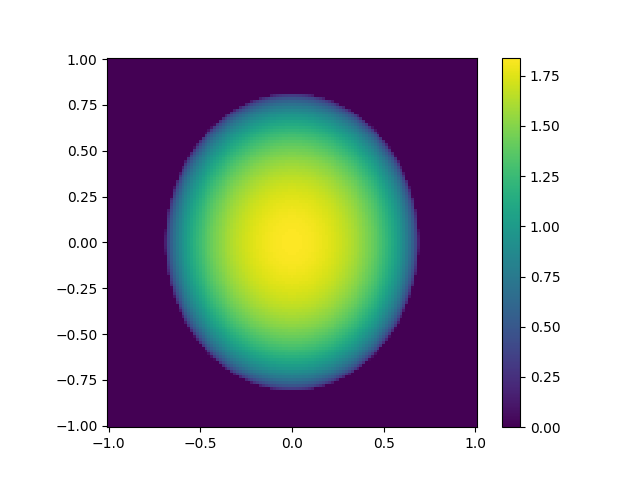

In [7]:
fig, ax = plt.subplots()
im = grid.plot(ax, Y)
plt.colorbar(im);

In [8]:
Y_0_45 = ellipsoid_proj(e, 0, 45, grid, deg=True)

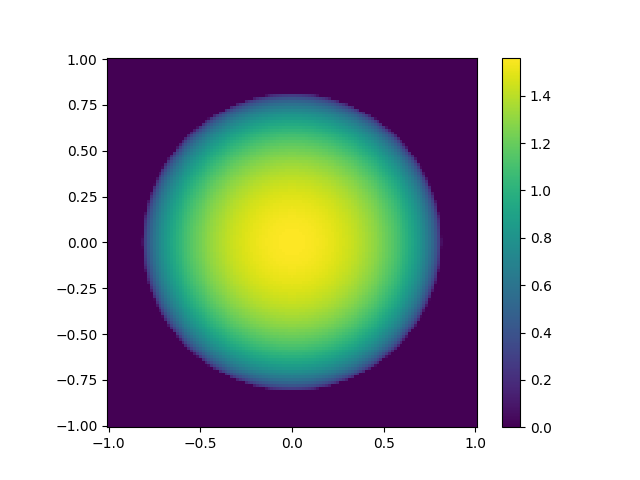

In [9]:
fig, ax = plt.subplots()
im = grid.plot(ax, Y_0_45)
plt.colorbar(im);